In [37]:
#plt96で様々なイオンで実行できるように一般化
import pandas as pd
import matplotlib.pyplot as plt
import decimal
import matplotlib.backends.backend_pdf

#イオン名と原子番号紐づけ(トリチウムはまだ含まず)
ion_dir={1:"h", 2:"he", 3:"li", 4:"be", 6:"c", 7:"n", 8:"o", 10:"ne", 14:"si",}

#取り出すイオン入力
I=ion_dir[4]   #ex I=ion_dir[4]
file=('plt96_%s_mod.dat' %I)

f=open(file)
line=f.readline()
line=line[6:]
dens=int(line[:2])   #密度
ev=int(line[3:5])   #電子温度
coff=int(line[6:])   #係数の数

df=pd.read_table(file,header=1,delim_whitespace=True)

C:\Users\KOH MATSUMOTO\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


In [38]:
len(df['dens'].unique())

24

In [39]:
print(dens)
print(ev)
print(coff)

24
25
4


In [40]:
df

,dens,coff,-0.6988,-0.5227,-0.3008,-0.1547,0.0794,0.3012,0.4773,0.6534,...,2.2306,2.4316,2.6337,2.8263,3.0214,3.2169,3.3981,3.6077,3.7995,4.0002
0,4.0000,1,-30.6628,-28.6999,-27.1638,-26.5273,-25.8828,-25.4877,-25.2356,-25.0271,...,-24.6362,-24.6682,-24.6991,-24.7284,-24.7581,-24.7878,-24.8152,-24.8469,-24.8759,-24.9061
1,4.0000,2,-32.7742,-29.9250,-27.7474,-26.8281,-25.8942,-25.3939,-25.1480,-24.9856,...,-24.8313,-24.8831,-24.9423,-25.0014,-25.0642,-25.1278,-25.1869,-25.2551,-25.3176,-25.3829
2,4.0000,3,-74.0000,-74.0000,-74.0000,-74.0000,-67.9684,-50.8720,-39.5209,-36.4285,...,-25.7595,-25.6762,-25.6139,-25.6032,-25.5770,-25.5802,-25.5787,-25.5707,-25.5630,-25.5546
3,4.0000,4,-74.0000,-74.0000,-74.0000,-74.0000,-74.0000,-74.0000,-45.2476,-41.8875,...,-25.9689,-25.8486,-25.7837,-25.7465,-25.7289,-25.7300,-25.7424,-25.7707,-25.8000,-25.8307
4,4.4771,1,-30.6694,-28.7061,-27.1705,-26.5341,-25.8905,-25.4963,-25.2440,-25.0344,...,-24.6366,-24.6684,-24.6993,-24.7286,-24.7582,-24.7878,-24.8153,-24.8469,-24.8759,-24.9062
5,4.4771,2,-32.7742,-29.9250,-27.7474,-26.8281,-25.8942,-25.3939,-25.1480,-24.9856,...,-24.8313,-24.8831,-24.9423,-25.0014,-25.0642,-25.1278,-25.1869,-25.2551,-25.3176,-25.3829
6,4.4771,3,-74.0000,-74.0000,-74.0000,-74.0000,-67.9681,-50.8703,-39.6738,-36.4271,...,-25.7595,-25.6762,-25.6139,-25.6032,-25.5770,-25.5800,-25.5787,-25.5711,-25.5636,-25.5555
7,4.4771,4,-74.0000,-74.0000,-74.0000,-74.0000,-74.0000,-74.0000,-45.2476,-41.8875,...,-25.9689,-25.8486,-25.7837,-25.7465,-25.7289,-25.7300,-25.7424,-25.7707,-25.8000,-25.8307
8,5.0000,1,-30.7004,-28.7359,-27.1981,-26.5621,-25.9195,-25.5199,-25.2638,-25.0522,...,-24.6377,-24.6692,-24.6998,-24.7290,-24.7585,-24.7881,-24.8154,-24.8470,-24.8760,-24.9062
9,5.0000,2,-32.7742,-29.9250,-27.7474,-26.8281,-25.8942,-25.3939,-25.1480,-24.9856,...,-24.8313,-24.8831,-24.9423,-25.0014,-25.0642,-25.1278,-25.1869,-25.2551,-25.3176,-25.3829


In [41]:
x=list(df.columns[2:])
x=[float(s) for s in x]

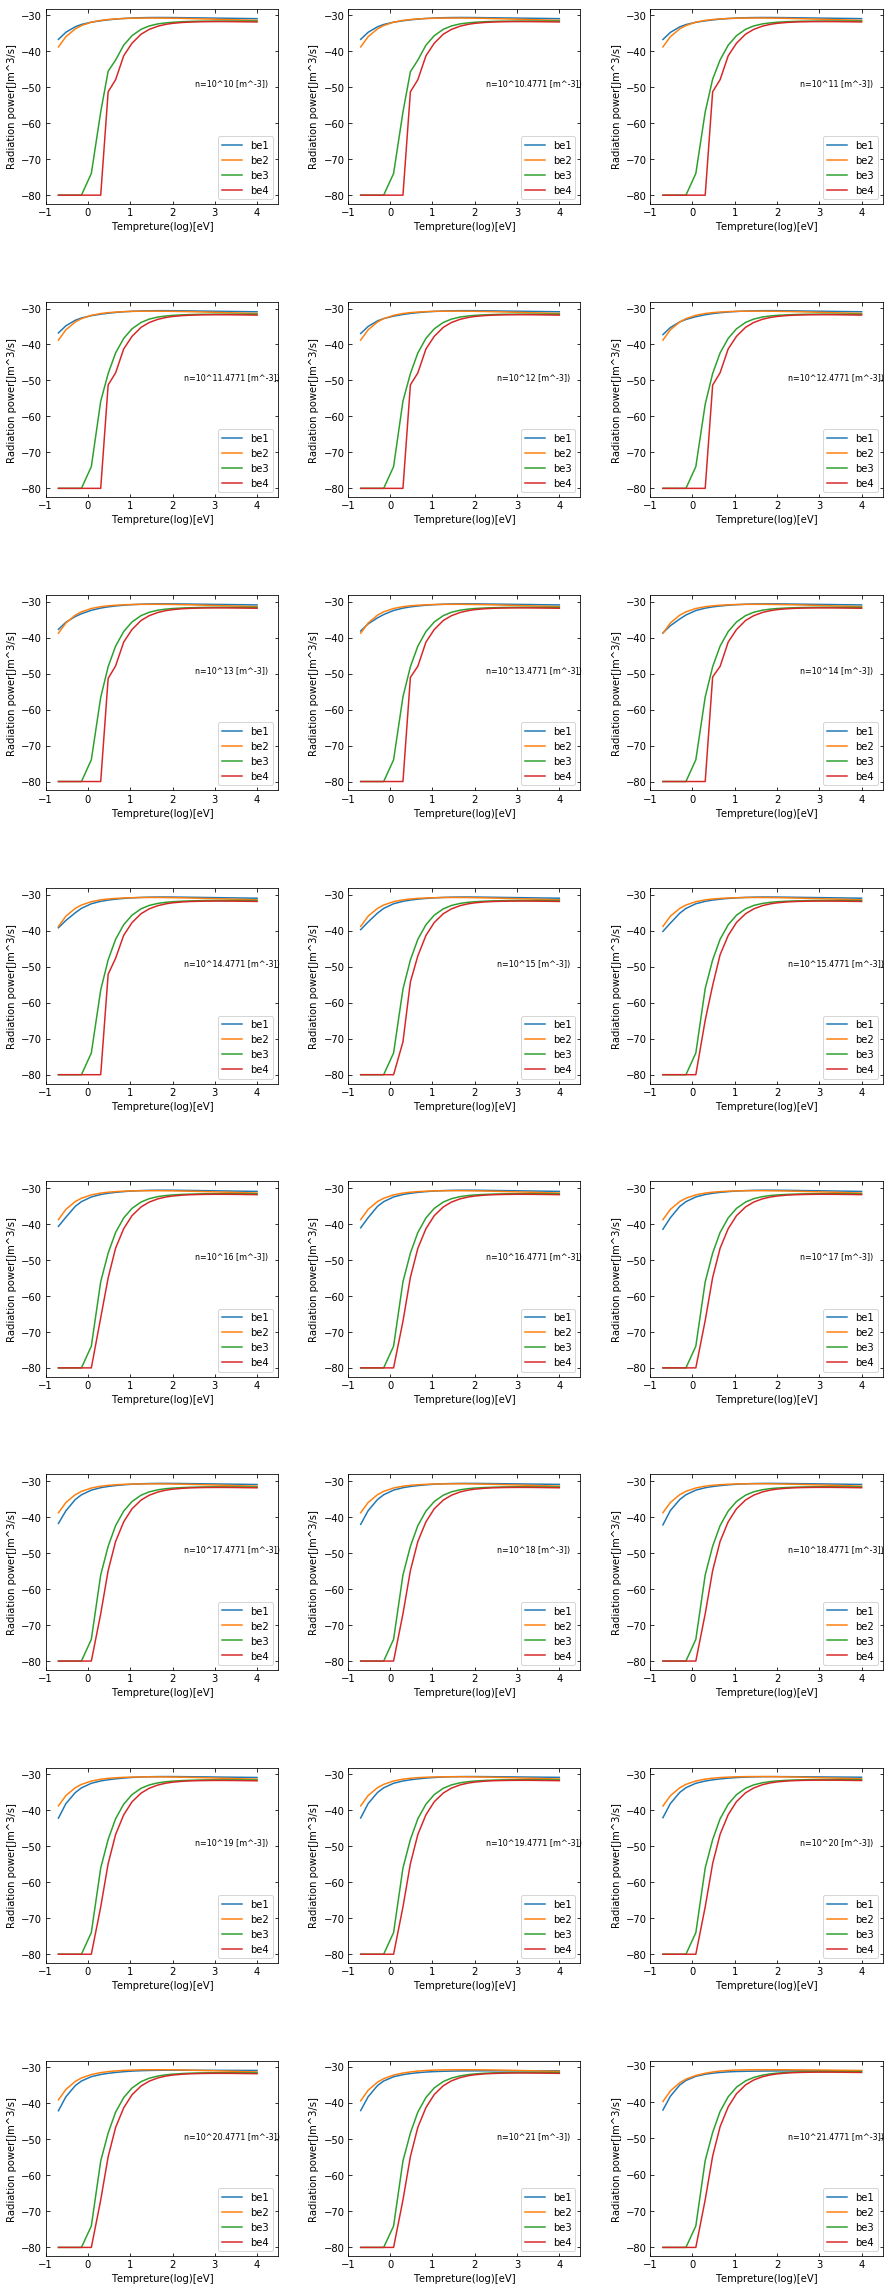

In [44]:
df_group=df.groupby('dens')
n=1   #グラフレイアウトの場所番号
w=15   #グラフ画像の幅
h=(len(df['dens'].unique())/3)*20   #高さ
fig=plt.figure(figsize=(w,h))
for d in df['dens'].unique():      
    ax=fig.add_subplot(30,3,n)
    ax.set_xlim(-1,4.5)
    ax.set_xlabel('Tempreture(log)[eV]')
    ax.set_ylabel('Radiation power[Jm^3/s]')
    plot_memo=('n=10^%s [m^-3])' %(decimal.Decimal(d)+decimal.Decimal(6)))
    ax.annotate(plot_memo, xy=(0.8, 0.6), fontsize=8, xycoords='axes fraction', horizontalalignment='center')
    ax.tick_params(direction='in' , bottom=True ,top=True ,left=True ,right=True)
    decimal.getcontext().prec = 6
    #title=('n=10^%s [m^-3])' %(decimal.Decimal(d)+decimal.Decimal(6)))
    #ax.set_title(title ,y=-0.25)

    
    y_dir={}
    for i in range(coff):
        y=df_group.get_group(d)[i:i+1].values[0][2:]
        decimal.getcontext().prec = 6
        y=[decimal.Decimal(s)-decimal.Decimal(6) for s in y]   #単位をm^3に
        y_dir[i]=y
        label=('%s%s' %(I,(i+1)))
        ax.plot(x,y_dir[i],label=label)
    ax.legend(loc=0)
    n += 1
fig.subplots_adjust(wspace=0.3, hspace=0.5) # グラフ間の隙間調整
plt.show()